#ANA680_Week 1_Assignment 2:
##Building LogReg Model

# Set up environment

In [ ]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Load and inspect data

In [ ]:
# Fetch dataset
cancer_load = fetch_ucirepo(id=15)

# Display basic information
print(cancer_load.variables)

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

#Data exploration

In [ ]:
# Create pd dataframe
cancer = pd.concat([cancer_load.data.features,
                    cancer_load.data.targets], axis=1)

# Display dataset basics with missing values
print(cancer.head())
print('\n')
print(cancer.describe())
print('\n')
missing_values = cancer.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values
print(missing_values)

   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2 

#Clean data

In [ ]:
# Rename 'Class':'Diagnosis' and change variable encoding
cancer = cancer.rename(columns={'Class': 'Diagnosis'})
cancer['Diagnosis'] = cancer['Diagnosis'].map({2: 0, 4: 1})

# Drop nulls
cancer_df = cancer.dropna(subset=['Bare_nuclei'])
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              683 non-null    int64  
 1   Uniformity_of_cell_size      683 non-null    int64  
 2   Uniformity_of_cell_shape     683 non-null    int64  
 3   Marginal_adhesion            683 non-null    int64  
 4   Single_epithelial_cell_size  683 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              683 non-null    int64  
 7   Normal_nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
 9   Diagnosis                    683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB
None


#Split into Train(75%) and Test(25%)

In [ ]:
# Split features and target
X = cancer_df.drop('Diagnosis', axis=1)
y = cancer_df['Diagnosis']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=680)

#Feature scaling

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression - model a

Logistic Regression Accuracy: 0.9591



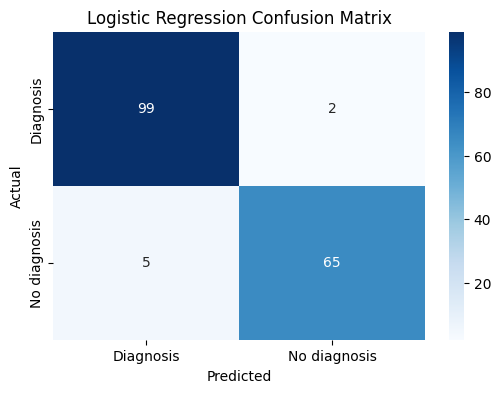

In [ ]:
# Logistic Regression (Scaled)
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scale, y_train)
y_pred = logreg_model.predict(X_test_scaled)

# Display
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {round(logreg_accuracy, 4)}")
print()
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Diagnosis', 'No diagnosis'],
            yticklabels=['Diagnosis', 'No diagnosis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#END